## Programming: Question 3 - 50 points

In this problem, we will use university application data for the purpose of admission classification. Find `data_train` and `data_test` on canvas.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

- **(a)** Data Pre-processing: Create a binary label based on the column "Chance of Admit". Convert any values bigger than the median to 1 and 0 otherwise. Split the data into training and validation sets. You can use a 80-20 split.

In [2]:
df = pd.read_csv('data_train-2.csv')
admit_threshold = df['Chance of Admit '].median()
df['Admit'] = df['Chance of Admit '].apply(lambda x: 1 if x > admit_threshold else 0)
display(Markdown(f"**Admission Threshold:** {admit_threshold}"))

**Admission Threshold:** 0.72

In [3]:
markdown_table = df.head().to_markdown(index=False)
display(Markdown(f"**Original DataFrame:**\n\n{markdown_table}"))

**Original DataFrame:**

|   Unnamed: 0 |   Serial No. |   GRE Score |   TOEFL Score |   University Rating |   SOP |   LOR  |   CGPA |   Research |   Chance of Admit  |   Admit |
|-------------:|-------------:|------------:|--------------:|--------------------:|------:|-------:|-------:|-----------:|-------------------:|--------:|
|            0 |          109 |         331 |           116 |                   5 |   5   |    5   |   9.38 |          1 |               0.93 |       1 |
|            1 |          346 |         316 |            98 |                   1 |   1.5 |    2   |   7.43 |          0 |               0.49 |       0 |
|            2 |           99 |         332 |           119 |                   4 |   5   |    4.5 |   9.24 |          1 |               0.9  |       1 |
|            3 |          210 |         301 |           104 |                   3 |   3.5 |    4   |   8.12 |          1 |               0.68 |       0 |
|            4 |          242 |         317 |           103 |                   2 |   2.5 |    2   |   8.15 |          0 |               0.65 |       0 |

In [4]:
X = df.drop(['Serial No.', 'Chance of Admit ', 'Admit'], axis=1)
y = df['Admit']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

shapes_md = f"""
**Dataset Shapes:**
- X_train: {X_train.shape}
- y_train: {y_train.shape}
- X_val: {X_val.shape}  
- y_val: {y_val.shape}
"""
display(Markdown(shapes_md))


**Dataset Shapes:**
- X_train: (256, 8)
- y_train: (256,)
- X_val: (64, 8)  
- y_val: (64,)


In [5]:
train_dist_md = f"**Training Set Distribution:**\n\n{y_train.value_counts(normalize=True).to_markdown()}"
display(Markdown(train_dist_md))

**Training Set Distribution:**

|   Admit |   proportion |
|--------:|-------------:|
|       0 |     0.519531 |
|       1 |     0.480469 |

In [6]:
val_dist_md = f"**Validation Set Distribution:**\n\n{y_val.value_counts(normalize=True).to_markdown()}"
display(Markdown(val_dist_md))

**Validation Set Distribution:**

|   Admit |   proportion |
|--------:|-------------:|
|       1 |       0.5625 |
|       0 |       0.4375 |

- **(b)** Model Initialization: Initialize 4 different SVM models with the following kernels:
  1. Linear kernel
  2. RBF kernel
  3. Polynomial (degree 3) kernel

In [7]:
svc_linear = SVC(kernel='linear', C=1, random_state=42)
svc_rbf = SVC(kernel='rbf', C=1, random_state=42)  
svc_poly = SVC(kernel='poly', C=1, degree=3, random_state=42)

models = [svc_linear, svc_rbf, svc_poly]
model_names = ['Linear SVM', 'RBF SVM', 'Polynomial SVM']

markdown_str = "**Initialized Models:**\n"
for model, name in zip(models, model_names):
    model_str = f"**{name}**\n```python\n{model}\n```"
    markdown_str += model_str + "\n\n"

display(Markdown(markdown_str))

**Initialized Models:**
**Linear SVM**
```python
SVC(C=1, kernel='linear', random_state=42)
```

**RBF SVM**
```python
SVC(C=1, random_state=42)
```

**Polynomial SVM**
```python
SVC(C=1, kernel='poly', random_state=42)
```



- **(c)** Feature Selection and Model Training: Train each SVM Model above with the following feature combinations to predict admission.
  1. CGPA and SOP
  2. CGPA and GRE Score
  3. SOP and LOR
  4. LOR and GRE Score

In [8]:
feature_sets = [
    ['CGPA', 'SOP'],
    ['CGPA', 'GRE Score'],
    ['SOP', 'LOR '],
    ['LOR ', 'GRE Score']
]

for features in feature_sets:
    display(Markdown(f"**Feature Set:** {features}"))
    for model, name in zip(models, model_names):
        model.fit(X_train[features], y_train)
        y_train_pred = model.predict(X_train[features])
        y_val_pred = model.predict(X_val[features])
        train_acc = accuracy_score(y_train, y_train_pred)
        val_acc = accuracy_score(y_val, y_val_pred)
        markdown_result = f"""
**{name}**  
- Training Accuracy: {train_acc:.3f}
- Validation Accuracy: {val_acc:.3f}
"""
        display(Markdown(markdown_result))

**Feature Set:** ['CGPA', 'SOP']


**Linear SVM**  
- Training Accuracy: 0.867
- Validation Accuracy: 0.812



**RBF SVM**  
- Training Accuracy: 0.875
- Validation Accuracy: 0.828



**Polynomial SVM**  
- Training Accuracy: 0.867
- Validation Accuracy: 0.812


**Feature Set:** ['CGPA', 'GRE Score']


**Linear SVM**  
- Training Accuracy: 0.852
- Validation Accuracy: 0.812



**RBF SVM**  
- Training Accuracy: 0.828
- Validation Accuracy: 0.766



**Polynomial SVM**  
- Training Accuracy: 0.828
- Validation Accuracy: 0.766


**Feature Set:** ['SOP', 'LOR ']


**Linear SVM**  
- Training Accuracy: 0.812
- Validation Accuracy: 0.719



**RBF SVM**  
- Training Accuracy: 0.812
- Validation Accuracy: 0.750



**Polynomial SVM**  
- Training Accuracy: 0.816
- Validation Accuracy: 0.766


**Feature Set:** ['LOR ', 'GRE Score']


**Linear SVM**  
- Training Accuracy: 0.859
- Validation Accuracy: 0.812



**RBF SVM**  
- Training Accuracy: 0.828
- Validation Accuracy: 0.766



**Polynomial SVM**  
- Training Accuracy: 0.828
- Validation Accuracy: 0.766


In [9]:
results = []
for features in feature_sets:
    for model, name in zip(models, model_names):
        model.fit(X_train[features], y_train)

        y_train_pred = model.predict(X_train[features])
        y_val_pred = model.predict(X_val[features])

        train_acc = accuracy_score(y_train, y_train_pred)
        val_acc = accuracy_score(y_val, y_val_pred)

        results.append([name, ", ".join(features), train_acc, val_acc])

results_df = pd.DataFrame(
    results, columns=['Model', 'Features', 'Train Accuracy', 'Validation Accuracy'])
display(Markdown("**Summary of Results**"))
display(Markdown(results_df.to_markdown(index=False)))

**Summary of Results**

| Model          | Features        |   Train Accuracy |   Validation Accuracy |
|:---------------|:----------------|-----------------:|----------------------:|
| Linear SVM     | CGPA, SOP       |         0.867188 |              0.8125   |
| RBF SVM        | CGPA, SOP       |         0.875    |              0.828125 |
| Polynomial SVM | CGPA, SOP       |         0.867188 |              0.8125   |
| Linear SVM     | CGPA, GRE Score |         0.851562 |              0.8125   |
| RBF SVM        | CGPA, GRE Score |         0.828125 |              0.765625 |
| Polynomial SVM | CGPA, GRE Score |         0.828125 |              0.765625 |
| Linear SVM     | SOP, LOR        |         0.8125   |              0.71875  |
| RBF SVM        | SOP, LOR        |         0.8125   |              0.75     |
| Polynomial SVM | SOP, LOR        |         0.816406 |              0.765625 |
| Linear SVM     | LOR , GRE Score |         0.859375 |              0.8125   |
| RBF SVM        | LOR , GRE Score |         0.828125 |              0.765625 |
| Polynomial SVM | LOR , GRE Score |         0.828125 |              0.765625 |

- **(d)** Support Vectors: What are the support vectors for each model and feature combination? How many support vectors does each class have in each case?

In [10]:
for features in feature_sets:
    display(Markdown(f"**Feature Set:** {features}"))

    for model, name in zip(models, model_names):
        model.fit(X_train[features], y_train)

        support_vectors = X_train[features].iloc[model.support_]
        n_support_per_class = model.n_support_
        sample_support_vectors = support_vectors.head(5)

        markdown_table = f"**{name}**\n" + \
                         f"- Number of Support Vectors for Class 0: {n_support_per_class[0]}\n" + \
                         f"- Number of Support Vectors for Class 1: {n_support_per_class[1]}\n\n" + \
                         "**Sample Support Vectors:**\n\n" + \
                         sample_support_vectors.to_markdown(index=False)
        markdown_stats = "\n**Support Vectors Statistics:**\n\n" + \
                         support_vectors.describe().to_markdown()

        display(Markdown(markdown_table))
        display(Markdown(markdown_stats))

**Feature Set:** ['CGPA', 'SOP']

**Linear SVM**
- Number of Support Vectors for Class 0: 46
- Number of Support Vectors for Class 1: 45

**Sample Support Vectors:**

|   CGPA |   SOP |
|-------:|------:|
|   8.2  |   3.5 |
|   8.6  |   3.5 |
|   8.5  |   3   |
|   8.69 |   4   |
|   8.73 |   3   |


**Support Vectors Statistics:**

|       |      CGPA |       SOP |
|:------|----------:|----------:|
| count | 91        | 91        |
| mean  |  8.57143  |  3.41209  |
| std   |  0.214929 |  0.626247 |
| min   |  8.1      |  2        |
| 25%   |  8.45     |  3        |
| 50%   |  8.56     |  3.5      |
| 75%   |  8.69     |  4        |
| max   |  9.11     |  5        |

**RBF SVM**
- Number of Support Vectors for Class 0: 58
- Number of Support Vectors for Class 1: 57

**Sample Support Vectors:**

|   CGPA |   SOP |
|-------:|------:|
|   8.2  |   3.5 |
|   8.6  |   3.5 |
|   8.5  |   3   |
|   8.17 |   3.5 |
|   8.69 |   4   |


**Support Vectors Statistics:**

|       |       CGPA |        SOP |
|:------|-----------:|-----------:|
| count | 115        | 115        |
| mean  |   8.56861  |   3.46957  |
| std   |   0.293798 |   0.639651 |
| min   |   7.66     |   2        |
| 25%   |   8.4      |   3        |
| 50%   |   8.56     |   3.5      |
| 75%   |   8.755    |   4        |
| max   |   9.4      |   5        |

**Polynomial SVM**
- Number of Support Vectors for Class 0: 42
- Number of Support Vectors for Class 1: 41

**Sample Support Vectors:**

|   CGPA |   SOP |
|-------:|------:|
|   8.6  |   3.5 |
|   8.5  |   3   |
|   8.69 |   4   |
|   8.73 |   3   |
|   8.64 |   5   |


**Support Vectors Statistics:**

|       |      CGPA |       SOP |
|:------|----------:|----------:|
| count | 83        | 83        |
| mean  |  8.56711  |  3.41566  |
| std   |  0.193923 |  0.628681 |
| min   |  8.14     |  2        |
| 25%   |  8.45     |  3        |
| 50%   |  8.56     |  3.5      |
| 75%   |  8.675    |  4        |
| max   |  9.04     |  5        |

**Feature Set:** ['CGPA', 'GRE Score']

**Linear SVM**
- Number of Support Vectors for Class 0: 43
- Number of Support Vectors for Class 1: 43

**Sample Support Vectors:**

|   CGPA |   GRE Score |
|-------:|------------:|
|   8.6  |         308 |
|   8.5  |         318 |
|   8.69 |         313 |
|   8.73 |         316 |
|   8.64 |         304 |


**Support Vectors Statistics:**

|       |      CGPA |   GRE Score |
|:------|----------:|------------:|
| count | 86        |    86       |
| mean  |  8.56465  |   316.221   |
| std   |  0.213386 |     5.74231 |
| min   |  8.1      |   303       |
| 25%   |  8.4325   |   312       |
| 50%   |  8.56     |   316       |
| 75%   |  8.6775   |   320       |
| max   |  9.04     |   329       |

**RBF SVM**
- Number of Support Vectors for Class 0: 108
- Number of Support Vectors for Class 1: 108

**Sample Support Vectors:**

|   CGPA |   GRE Score |
|-------:|------------:|
|   8.2  |         304 |
|   8.2  |         311 |
|   8.6  |         308 |
|   8.5  |         318 |
|   8.17 |         300 |


**Support Vectors Statistics:**

|       |       CGPA |   GRE Score |
|:------|-----------:|------------:|
| count | 216        |   216       |
| mean  |   8.58639  |   316.792   |
| std   |   0.536218 |     9.42279 |
| min   |   6.8      |   300       |
| 25%   |   8.2175   |   310       |
| 50%   |   8.56     |   316       |
| 75%   |   9.02     |   324       |
| max   |   9.87     |   335       |

**Polynomial SVM**
- Number of Support Vectors for Class 0: 63
- Number of Support Vectors for Class 1: 63

**Sample Support Vectors:**

|   CGPA |   GRE Score |
|-------:|------------:|
|   8.2  |         311 |
|   8.5  |         318 |
|   8.12 |         309 |
|   8.01 |         312 |
|   8.69 |         313 |


**Support Vectors Statistics:**

|       |       CGPA |   GRE Score |
|:------|-----------:|------------:|
| count | 126        |    126      |
| mean  |   8.54833  |    316.77   |
| std   |   0.411627 |      5.3204 |
| min   |   7.3      |    303      |
| 25%   |   8.285    |    312.25   |
| 50%   |   8.56     |    316      |
| 75%   |   8.7975   |    321      |
| max   |   9.45     |    329      |

**Feature Set:** ['SOP', 'LOR ']

**Linear SVM**
- Number of Support Vectors for Class 0: 58
- Number of Support Vectors for Class 1: 58

**Sample Support Vectors:**

|   SOP |   LOR  |
|------:|-------:|
|   3.5 |    3   |
|   3.5 |    2.5 |
|   4   |    4.5 |
|   3   |    3.5 |
|   5   |    4   |


**Support Vectors Statistics:**

|       |       SOP |       LOR  |
|:------|----------:|-----------:|
| count | 116       | 116        |
| mean  |   3.46983 |   3.5      |
| std   |   0.61251 |   0.543739 |
| min   |   2       |   2.5      |
| 25%   |   3       |   3        |
| 50%   |   3.5     |   3.5      |
| 75%   |   4       |   4        |
| max   |   5       |   5        |

**RBF SVM**
- Number of Support Vectors for Class 0: 59
- Number of Support Vectors for Class 1: 59

**Sample Support Vectors:**

|   SOP |   LOR  |
|------:|-------:|
|   3.5 |    3   |
|   3.5 |    2.5 |
|   4   |    4.5 |
|   3   |    3.5 |
|   5   |    4   |


**Support Vectors Statistics:**

|       |        SOP |       LOR  |
|:------|-----------:|-----------:|
| count | 118        | 118        |
| mean  |   3.50424  |   3.42797  |
| std   |   0.755311 |   0.677083 |
| min   |   1        |   1        |
| 25%   |   3        |   3        |
| 50%   |   3.5      |   3.5      |
| 75%   |   4        |   4        |
| max   |   5        |   5        |

**Polynomial SVM**
- Number of Support Vectors for Class 0: 58
- Number of Support Vectors for Class 1: 57

**Sample Support Vectors:**

|   SOP |   LOR  |
|------:|-------:|
|   3.5 |    3   |
|   3.5 |    2.5 |
|   4   |    4.5 |
|   3   |    3   |
|   3   |    3.5 |


**Support Vectors Statistics:**

|       |        SOP |       LOR  |
|:------|-----------:|-----------:|
| count | 115        | 115        |
| mean  |   3.48696  |   3.47391  |
| std   |   0.594053 |   0.529165 |
| min   |   2        |   2.5      |
| 25%   |   3        |   3        |
| 50%   |   3.5      |   3.5      |
| 75%   |   4        |   4        |
| max   |   5        |   5        |

**Feature Set:** ['LOR ', 'GRE Score']

**Linear SVM**
- Number of Support Vectors for Class 0: 43
- Number of Support Vectors for Class 1: 43

**Sample Support Vectors:**

|   LOR  |   GRE Score |
|-------:|------------:|
|    3   |         318 |
|    4.5 |         313 |
|    3   |         320 |
|    3.5 |         316 |
|    4   |         318 |


**Support Vectors Statistics:**

|       |      LOR  |   GRE Score |
|:------|----------:|------------:|
| count | 86        |    86       |
| mean  |  3.44767  |   316.593   |
| std   |  0.632591 |     5.93569 |
| min   |  1.5      |   303       |
| 25%   |  3        |   312.25    |
| 50%   |  3.5      |   316       |
| 75%   |  4        |   320       |
| max   |  5        |   329       |

**RBF SVM**
- Number of Support Vectors for Class 0: 109
- Number of Support Vectors for Class 1: 109

**Sample Support Vectors:**

|   LOR  |   GRE Score |
|-------:|------------:|
|    3   |         304 |
|    2   |         311 |
|    3   |         308 |
|    3   |         318 |
|    2.5 |         300 |


**Support Vectors Statistics:**

|       |       LOR  |   GRE Score |
|:------|-----------:|------------:|
| count | 218        |   218       |
| mean  |   3.48624  |   316.798   |
| std   |   0.891482 |     9.54618 |
| min   |   1.5      |   299       |
| 25%   |   3        |   310       |
| 50%   |   3.5      |   316       |
| 75%   |   4        |   324       |
| max   |   5        |   336       |

**Polynomial SVM**
- Number of Support Vectors for Class 0: 63
- Number of Support Vectors for Class 1: 63

**Sample Support Vectors:**

|   LOR  |   GRE Score |
|-------:|------------:|
|    2   |         311 |
|    3   |         318 |
|    3   |         309 |
|    1.5 |         312 |
|    4.5 |         313 |


**Support Vectors Statistics:**

|       |       LOR  |   GRE Score |
|:------|-----------:|------------:|
| count | 126        |    126      |
| mean  |   3.46825  |    316.77   |
| std   |   0.854976 |      5.3204 |
| min   |   1.5      |    303      |
| 25%   |   3        |    312.25   |
| 50%   |   3.5      |    316      |
| 75%   |   4        |    321      |
| max   |   5        |    329      |

- **(e)** Result Visualization: For each kernel - input combination, visualize the predictions on the training set. Color code the points by their labels.

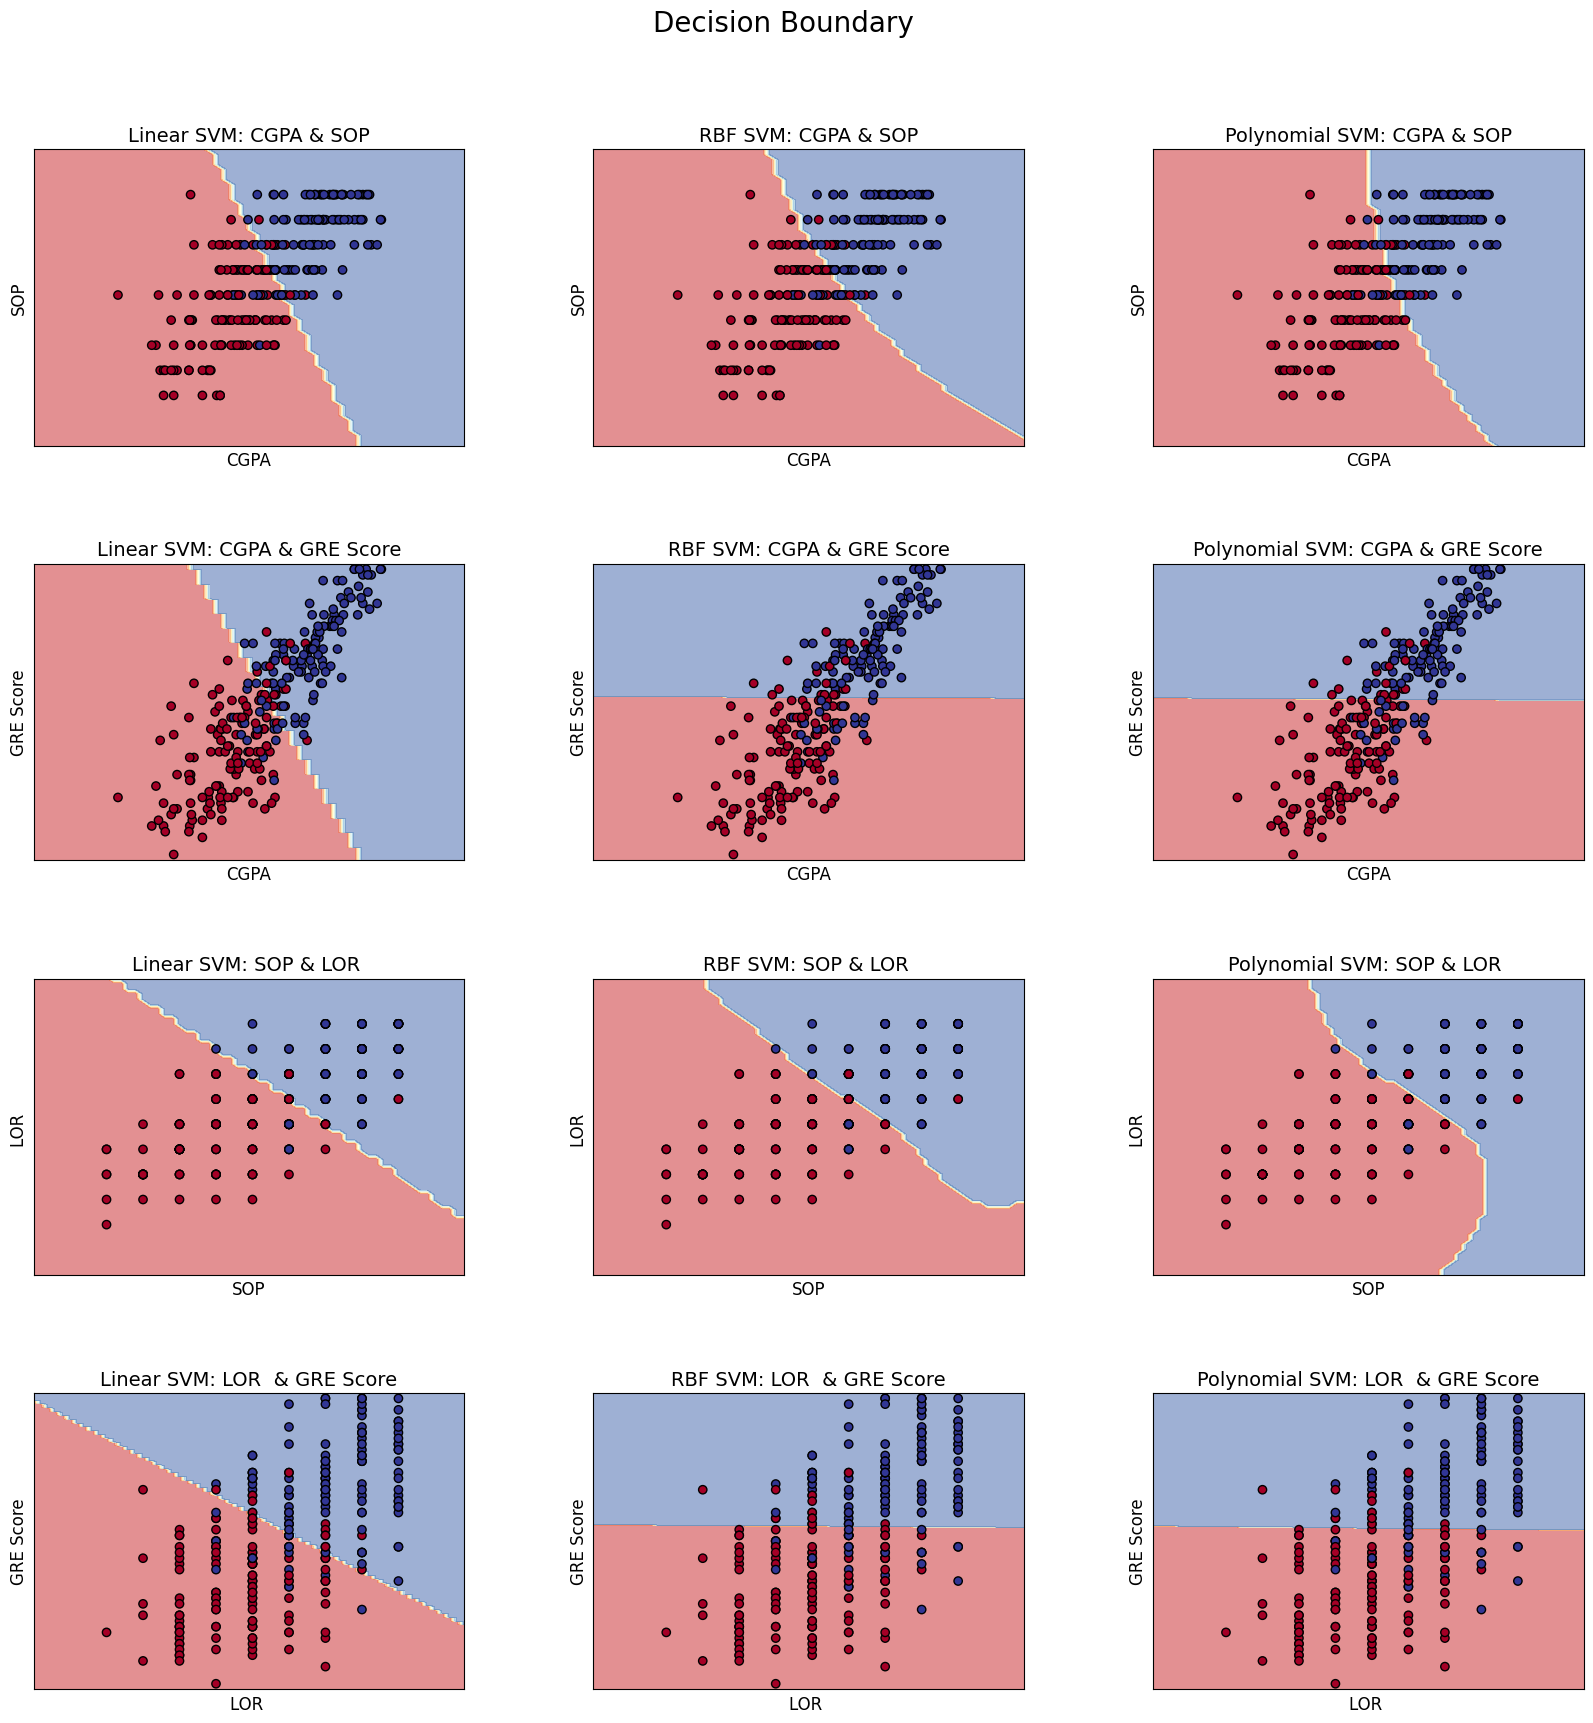

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fig, axs = plt.subplots(len(feature_sets), len(models), figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, features in enumerate(feature_sets):
    for j, model in enumerate(models):
        ax = axs[i, j]

        X_plot = X_train[features]
        y_plot = y_train

        model.fit(X_plot, y_plot)

        x_min, x_max = X_plot.iloc[:, 0].min() - 1, X_plot.iloc[:, 0].max() + 1
        y_min, y_max = X_plot.iloc[:, 1].min() - 1, X_plot.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        predict_data = pd.DataFrame(
            np.c_[xx.ravel(), yy.ravel()], columns=features)
        Z = model.predict(predict_data).reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)
        ax.scatter(X_plot.iloc[:, 0], X_plot.iloc[:, 1],
                   c=y_plot, cmap=plt.cm.RdYlBu, edgecolor='k')

        ax.set_title(
            f"{model_names[j]}: {features[0]} & {features[1]}", fontsize=14)
        ax.set_xlabel(features[0], fontsize=12)
        ax.set_ylabel(features[1], fontsize=12)

        ax.grid(False)
        ax.set_xticks(())
        ax.set_yticks(())

plt.suptitle('Decision Boundary', fontsize=20, y=0.95)
plt.show()

- **(f)** Result Analysis: Just by looking at the figures you generated, answer this question: Which features + kernel combinations give you the best result? Validate your model on the validation set and find the best performing combination with respect to accuracy.

In [14]:
best_model_idx = results_df['Validation Accuracy'].argmax()
best_model_row = results_df.iloc[best_model_idx]

best_model_md = f"""
**Best Model Configuration:**

- Model: {best_model_row['Model']}
- Features: {best_model_row['Features']}
- Training Accuracy: {best_model_row['Train Accuracy']:.3f}
- Validation Accuracy: {best_model_row['Validation Accuracy']:.3f}
"""
display(Markdown(best_model_md))


**Best Model Configuration:**

- Model: RBF SVM
- Features: CGPA, SOP
- Training Accuracy: 0.875
- Validation Accuracy: 0.828


In [15]:
feature_performances = results_df.groupby(
    'Features')['Validation Accuracy'].mean().sort_values(ascending=False)
feature_importances_md = "**Feature Importance Analysis:**\n\n" + \
    "|Feature Set|Validation Accuracy|\n|---|---|\n"
for index, value in feature_performances.items():
    feature_importances_md += f"|{index}|{value:.3f}|\n"

display(Markdown(feature_importances_md))

**Feature Importance Analysis:**

|Feature Set|Validation Accuracy|
|---|---|
|CGPA, SOP|0.818|
|CGPA, GRE Score|0.781|
|LOR , GRE Score|0.781|
|SOP, LOR |0.745|


In [16]:
kernel_performances = results_df.groupby(
    'Model')['Validation Accuracy'].mean().sort_values(ascending=False)

kernel_comparison_md = "**Kernel Comparison:**\n\n" + \
    "|Kernel|Validation Accuracy|\n|---|---|\n"
for index, value in kernel_performances.items():
    kernel_comparison_md += f"|{index}|{value:.3f}|\n"

display(Markdown(kernel_comparison_md))

**Kernel Comparison:**

|Kernel|Validation Accuracy|
|---|---|
|Linear SVM|0.789|
|Polynomial SVM|0.777|
|RBF SVM|0.777|


- **(g)** Inference: Use the best model you found in the previous step to predict the label of the test data. Save the prediction in a csv file "FirstName_LastName_preds.csv"

In [17]:
test_df = pd.read_csv('data_test-2.csv')
X_test = test_df.drop(['Serial No.'], axis=1)
best_model = svc_linear
best_features = ['CGPA', 'GRE Score']
best_model.fit(X_train[best_features], y_train)
test_pred = best_model.predict(X_test[best_features])
output = pd.DataFrame({'pred_svm': test_pred})
output.to_csv('Chonglin_Zhang_preds.csv', index=False)

In [20]:
test_predictions_md = output.to_markdown(index=False)
display(Markdown(test_predictions_md))

|   pred_svm |
|-----------:|
|          0 |
|          0 |
|          1 |
|          1 |
|          0 |
|          0 |
|          1 |
|          1 |
|          1 |
|          1 |
|          1 |
|          1 |
|          0 |
|          1 |
|          0 |
|          1 |
|          0 |
|          1 |
|          1 |
|          1 |
|          1 |
|          1 |
|          0 |
|          1 |
|          1 |
|          0 |
|          1 |
|          1 |
|          0 |
|          1 |
|          0 |
|          0 |
|          1 |
|          0 |
|          0 |
|          0 |
|          1 |
|          1 |
|          1 |
|          0 |
|          0 |
|          1 |
|          1 |
|          1 |
|          0 |
|          1 |
|          0 |
|          1 |
|          1 |
|          0 |
|          1 |
|          1 |
|          1 |
|          1 |
|          1 |
|          0 |
|          0 |
|          0 |
|          0 |
|          0 |
|          0 |
|          0 |
|          0 |
|          0 |
|          1 |
|          1 |
|          1 |
|          0 |
|          0 |
|          0 |
|          0 |
|          1 |
|          0 |
|          1 |
|          1 |
|          0 |
|          1 |
|          0 |
|          0 |
|          1 |

In [21]:
test_pred_distribution = output['pred_svm'].value_counts().to_frame('count')
display(Markdown("**Test Prediction Distribution:**\n"))
test_pred_distribution_md = test_pred_distribution.to_markdown()
display(Markdown(test_pred_distribution_md))

**Test Prediction Distribution:**


|   pred_svm |   count |
|-----------:|--------:|
|          1 |      43 |
|          0 |      37 |